<a href="https://colab.research.google.com/github/FarahRadwan/MachineLearning/blob/main/Linear_Regression1_final_43_3247_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics, linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, r2_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:

from sklearn.datasets import load_boston
boston = load_boston()

In [ ]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
#Data doesnot contain null values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [ ]:
#Scaling the data as they are not in the same range
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(df)
#y_scaled=scaler.fit_transform(y)

In [ ]:
#Dividing data into train,test,validation 60,20,20
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.25) #0.8*0.25=0.2
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(y_train.shape))
print("y val shape: {}".format(y_test.shape))

X_train shape: (303, 13)
X_test shape: (102, 13)
y_train shape: (303,)
y_test shape: (102,)
X_val shape: (303,)
y val shape: (102,)


In [ ]:
#Applying Linear regression
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
print("RMSE of Linear Regression without Regularization",np.sqrt(metrics.mean_squared_error(y_test,predictions)))
acc=lm.score(X_test,y_test)
print("Accuracy_score:",acc)
r2 = r2_score(y_test, predictions)
predictions_val=lm.predict(X_val)
print("RMSE of Linear Regression without Regularization Validation",np.sqrt(metrics.mean_squared_error(y_val,predictions_val)))
acc_val=lm.score(X_val,y_val)
print("Accuracy_score Validation:",acc_val)
#The fisrt 2 outputs on the test

RMSE of Linear Regression without Regularization 4.621302764378058
Accuracy_score: 0.6682102627221644
RMSE of Linear Regression without Regularization Validation 4.544170426467037
Accuracy_score Validation: 0.7212457625113413


In [ ]:
#To get the best degree without regularization
err_val=[]
deg=[]
err_train=[]
score_val=[]
score_train=[]
errval=[]
errtrain=[]
for i in range(10):
    x=i+1
    deg.append(x)
    poly = PolynomialFeatures(degree = x)
    X_poly = poly.fit_transform(X_train)
    x_poly_val=poly.transform(X_val)
    pol=linear_model.LinearRegression()
    pol.fit(X_poly, y_train) 
    y_pred=pol.predict(x_poly_val)
    scre_val=pol.score(x_poly_val,y_val)
    mean_error=np.sqrt(metrics.mean_squared_error(y_val,y_pred))
    err_val.append(mean_error)
    score_val.append(scre_val)
    y_train_pred=pol.predict(X_poly)
    mean_error_train=np.sqrt(metrics.mean_squared_error(y_train,y_train_pred))
    err_train.append(mean_error_train)
    scre_train=pol.score(X_poly,y_train)

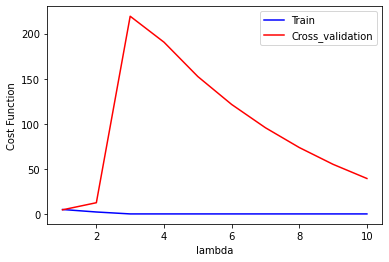

In [ ]:
fig, ax = plt.subplots()
ax.plot(deg, err_train, '-b', label='Train')
ax.plot(deg, err_val, '-r', label='Cross_validation')
plt.xlabel("lambda")
plt.ylabel("Cost Function")
leg = ax.legend();

In [ ]:
best_degree=deg[np.argmin(err_val)]
print("Degree of the polynomial is",best_degree)
print("RMSE without Regularization on validation",np.min(err_val))
print("score without regularization on validation",np.max(score_val)*100)

Degree of the polynomial is 1
RMSE without Regularization on validation 4.544170426467036
score without regularization on validation 72.12457625113416


In [ ]:
# get accuracy of best degree on test set without regularization
poly = PolynomialFeatures(degree = best_degree)
X_poly = poly.fit_transform(X_train)
x_poly_test=poly.transform(X_test)
pol=linear_model.LinearRegression()
pol.fit(X_poly, y_train) 
y_pred=pol.predict(x_poly_test)
score_noregul=pol.score(x_poly_test,y_test)
mean_error_noregul=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("score of the best degree on test:",score_noregul*100)
print("Error of the best degree on test set:",mean_error_noregul)

score of the best degree on test: 66.82102627221641
Error of the best degree on test set: 4.62130276437806


In [ ]:
#Lasso regularization with the best degree obtained
err_val=[]
deg=[]
err_train=[]
alpha=[]
errval=[]
errtrain=[]
scr_val=[]
scr_train=[]
lambdas=[0,0.01,0.02,0.04,0.08,0.16,0.32,0.64,2.56,5.12,10.24,20,100,500,1000]
for i in lambdas:
    alpha.append(i)
    poly = PolynomialFeatures(degree = best_degree)
    X_poly = poly.fit_transform(X_train)
    x_poly_val=poly.transform(X_val)
    pol=linear_model.Lasso(alpha=i)
    pol.fit(X_poly, y_train) 
    scrval=pol.score(x_poly_val,y_val)
    scr_val.append(scrval)
    errval.append(1-scrval)
    y_pred=pol.predict(x_poly_val)
    mean_error=np.sqrt(metrics.mean_squared_error(y_val,y_pred))
    err_val.append(mean_error)
    y_train_pred=pol.predict(X_poly)
    scrtrain=pol.score(X_poly,y_train)
    scr_train.append(scrtrain)
    errtrain.append(1-scrtrain)
    mean_error_train=np.sqrt(metrics.mean_squared_error(y_train,y_train_pred))
    err_train.append(mean_error_train)

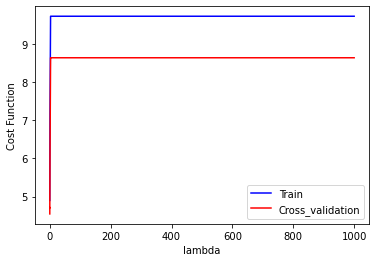

In [ ]:
fig, ax = plt.subplots()
ax.plot(alpha, err_train, '-b', label='Train')
ax.plot(alpha, err_val, '-r', label='Cross_validation')
plt.xlabel("lambda")
plt.ylabel("Cost Function")
leg = ax.legend();
#underfitting in the data

In [ ]:
best=lambdas[np.argmin(err_val)]
best
#best_lambda the less error in both train and cross 0=no regularization

0

In [ ]:
err_val

[4.544170426467035,
 4.630175531998969,
 4.714857944488034,
 4.697804145492782,
 4.819072365410004,
 5.03322603690787,
 5.244822997933166,
 6.006617209236502,
 8.633238766418515,
 8.633238766418515,
 8.633238766418515,
 8.633238766418515,
 8.633238766418515,
 8.633238766418515,
 8.633238766418515]

In [ ]:
err_train

[4.897631730694839,
 4.91318434416123,
 4.94597859957073,
 5.016984806755473,
 5.242399999759349,
 5.62264724357415,
 6.0751370871065555,
 7.171352252351429,
 9.720475330211617,
 9.720475330211617,
 9.720475330211617,
 9.720475330211617,
 9.720475330211617,
 9.720475330211617,
 9.720475330211617]

In [ ]:
diff_lasso=[]
for i in range (len(err_train)):
    diff_lasso.append(np.abs(err_val[i]-err_train[i]))
    

In [ ]:
diff_lasso 

[0.3534613042278041,
 0.2830088121622616,
 0.2311206550826963,
 0.31918066126269107,
 0.42332763434934506,
 0.5894212066662803,
 0.8303140891733891,
 1.164735043114927,
 1.0872365637931019,
 1.0872365637931019,
 1.0872365637931019,
 1.0872365637931019,
 1.0872365637931019,
 1.0872365637931019,
 1.0872365637931019]

In [ ]:
#Test with lasso regularizaton with best_degree
poly = PolynomialFeatures(degree = best_degree)
X_poly = poly.fit_transform(X_train)
x_poly_test=poly.transform(X_test)
pol=linear_model.Lasso(alpha=best)
pol.fit(X_poly, y_train) 
y_pred=pol.predict(x_poly_test)
ypred_lasso=pol.score(x_poly_test,y_test)
mean_error_test_lasso=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("score_lasso",ypred_lasso*100)
print("error_lasso",mean_error_test_lasso)

score_lasso 66.82102627221641
error_lasso 4.621302764378059


In [ ]:
#Ridge regularization with the best degree obtained
err_val=[]
deg=[]
err_train=[]
alpha=[]
errval=[]
errtrain=[]
scr_val=[]
scr_train=[]
lambdas=[0,0.01,0.02,0.04,0.08,0.16,0.32,0.64,2.56,5.12,10.24,20,100,500,1000]
for i in lambdas:
    alpha.append(i)
    poly = PolynomialFeatures(degree = best_degree)
    X_poly = poly.fit_transform(X_train)
    x_poly_val=poly.transform(X_val)
    pol=linear_model.Ridge(alpha=i)
    pol.fit(X_poly, y_train) 
    scrval=pol.score(x_poly_val,y_val)
    scr_val.append(scrval)
    errval.append(1-scrval)
    y_pred=pol.predict(x_poly_val)
    mean_error=np.sqrt(metrics.mean_squared_error(y_val,y_pred))
    err_val.append(mean_error)
    y_train_pred=pol.predict(X_poly)
    scrtrain=pol.score(X_poly,y_train)
    scr_train.append(scrtrain)
    errtrain.append(1-scrtrain)
    mean_error_train=np.sqrt(metrics.mean_squared_error(y_train,y_train_pred))
    err_train.append(mean_error_train)

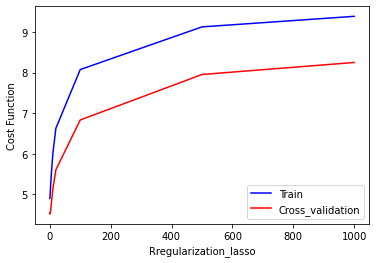

In [ ]:
fig, ax = plt.subplots()
ax.plot(alpha, err_train, '-b', label='Train')
ax.plot(alpha, err_val, '-r', label='Cross_validation')
plt.xlabel("Rregularization_lasso")
plt.ylabel("Cost Function")
leg = ax.legend();
#underfitting in the data as lambda increases

In [ ]:
best_ridge=lambdas[np.argmin(err_val)]
best_ridge
#min_error 0.64

0.64

In [ ]:
err_val

[4.544170426467035,
 4.543116191731784,
 4.542120650463826,
 4.540281983505234,
 4.537084833967198,
 4.531943303511627,
 4.5243084161391875,
 4.515344708385318,
 4.581378005239091,
 4.775776038126546,
 5.138928003909918,
 5.6047134910639915,
 6.833331513910141,
 7.953798518312386,
 8.249916989371323]

In [ ]:
err_train

[4.897631730694839,
 4.897650638368603,
 4.897706176283583,
 4.897920581494904,
 4.8987232736977635,
 4.901579920404402,
 4.911019626986076,
 4.939325158806882,
 5.185136823066305,
 5.510404360652182,
 6.016995467864392,
 6.629010846558781,
 8.075507897661298,
 9.127278207357932,
 9.387381924815818]

In [ ]:
#Test with lasso regularizaton with best_degree
poly = PolynomialFeatures(degree = best_degree)
X_poly = poly.fit_transform(X_train)
x_poly_test=poly.transform(X_test)
pol=linear_model.Ridge(alpha=best_ridge)
pol.fit(X_poly, y_train) 
y_pred=pol.predict(x_poly_test)
ypred_ridge=pol.score(x_poly_test,y_test)
mean_error_test_ridge=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("score",ypred_ridge*100)
print("error",mean_error_test_ridge)

score 72.67854986017204
error 4.193578927258923


In [ ]:
print("Error without Regularization:",mean_error_noregul)
print("score without Regularization:",score_noregul*100)
print("Error with Lasso:",mean_error_test_lasso)
print("score with Lasso:",ypred_lasso*100)
print("Error with Ridge:",mean_error_test_ridge)
print("score with Ridge:",ypred_ridge*100)
#similar outputs

Error without Regularization: 4.62130276437806
score without Regularization: 66.82102627221641
Error with Lasso: 4.621302764378059
score with Lasso: 66.82102627221641
Error with Ridge: 4.193578927258923
score with Ridge: 72.67854986017204


0
1
2
3
4
5
6
7
8
9


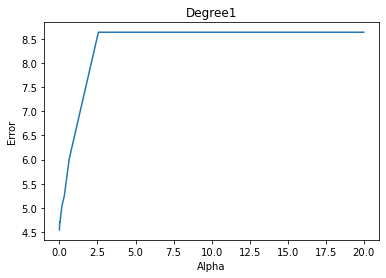

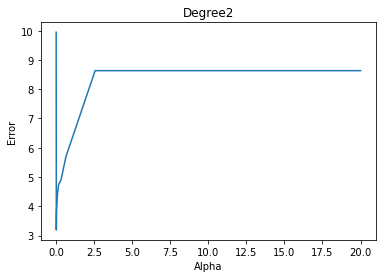

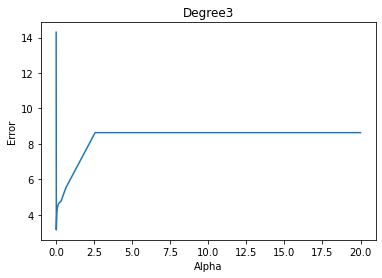

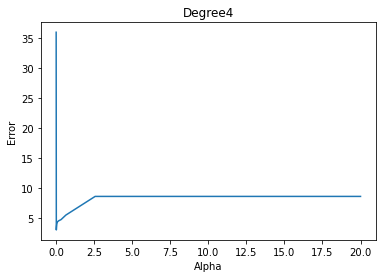

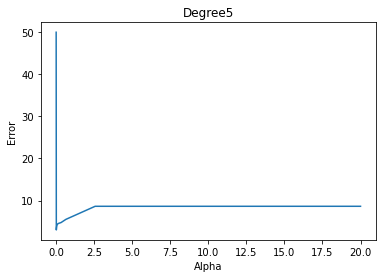

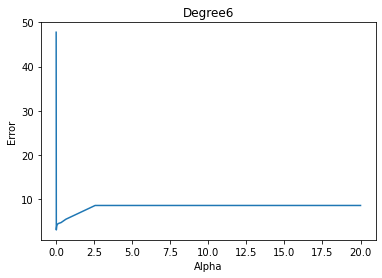

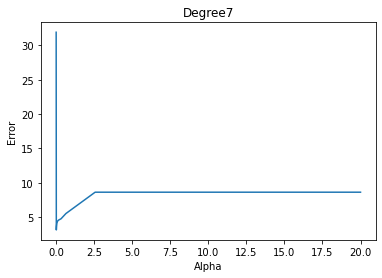

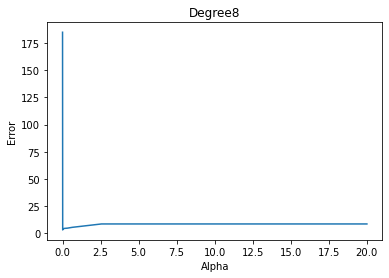

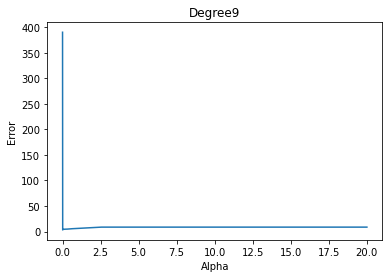

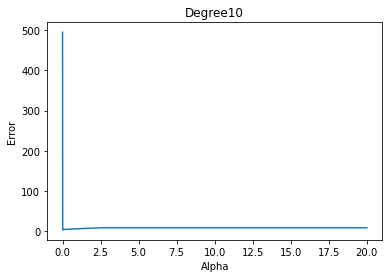

In [ ]:
#Lasso Regulurization with degrees 
min=[]
alpha=[]
deg=[]
best_degree_reg=[]
lambdas=[0,0.01,0.02,0.04,0.08,0.16,0.32,0.64,2.56,5.12,10.24,20]
for i in range (10):
    err_val=[]
    for j in lambdas :
     poly = PolynomialFeatures(degree = i+1)
     X_poly = poly.fit_transform(X_train)
     x_poly_val=poly.transform(X_val)
     pol=linear_model.Lasso(alpha=j)
     pol.fit(X_poly, y_train) 
     y_pred=pol.predict(x_poly_val)
     mean_error=np.sqrt(metrics.mean_squared_error(y_val,y_pred))
     err_val.append(mean_error)
     y_train_pred=pol.predict(X_poly)
     mean_error_train=np.sqrt(metrics.mean_squared_error(y_train,y_train_pred))
     err_train.append(mean_error_train)
    print(i)
    plt.figure()
    plt.plot(lambdas,err_val)
    x="Degree"+str(i+1)
    plt.title(x)
    plt.xlabel("Alpha")
    plt.ylabel("Error")
    min.append(np.min(err_val))
    alpha.append(lambdas[np.argmin(err_val)])
    deg.append(i+1)
   

In [ ]:
np.min(min)
#min_error

3.0193374842506047

In [ ]:
deg_lasso=deg[np.argmin(min)]
deg_lasso
#the degree used is 5

5

In [ ]:
lambda_lasso=alpha[np.argmin(min)]
lambda_lasso
#the most suitable lambda to use 0.01

0.01

In [ ]:
#Test with lasso regularizaton with best_degree 5 and lambda_lasso 0.01
poly = PolynomialFeatures(degree = deg_lasso)
X_poly = poly.fit_transform(X_train)
x_poly_test=poly.transform(X_test)
pol=linear_model.Lasso(alpha=lambda_lasso)
pol.fit(X_poly, y_train) 
y_pred=pol.predict(x_poly_test)
ypred=pol.score(x_poly_test,y_test)
mean_error_test=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("score",ypred*100)
print("error",mean_error_test)

score 87.52196529048801
error 2.8340404371009074


0
1
2
3
4
5
6
7
8
9


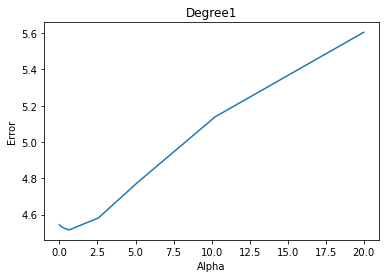

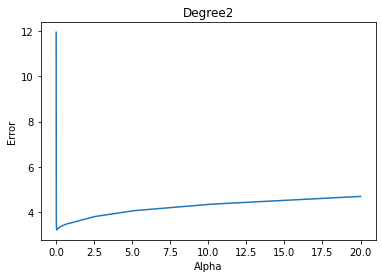

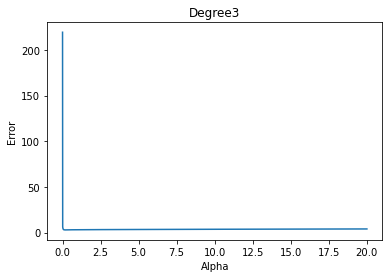

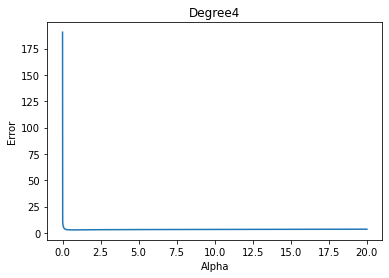

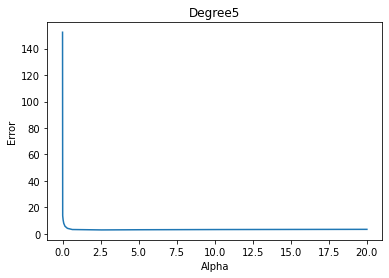

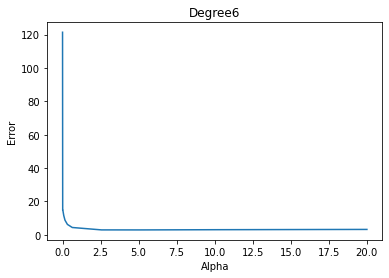

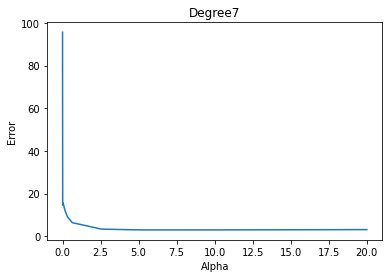

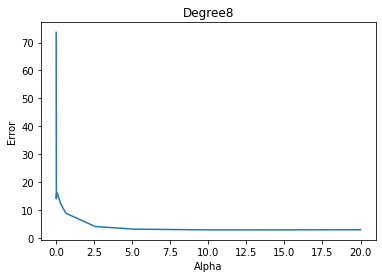

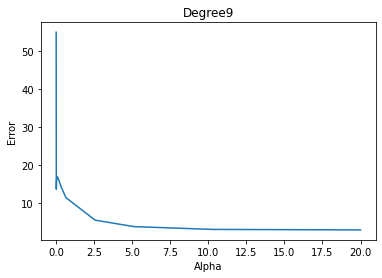

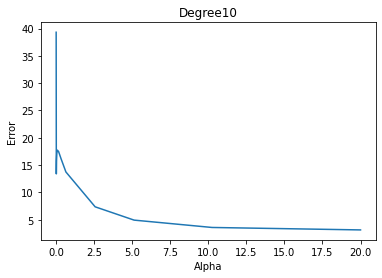

In [ ]:
#Ridge Regulurization with degrees 
min=[]
alpha=[]
deg=[]
best_degree_reg=[]
lambdas=[0,0.01,0.02,0.04,0.08,0.16,0.32,0.64,2.56,5.12,10.24,20]
for i in range (10):
    err_val=[]
    for j in lambdas :
     poly = PolynomialFeatures(degree = i+1)
     X_poly = poly.fit_transform(X_train)
     x_poly_val=poly.transform(X_val)
     pol=linear_model.Ridge(alpha=j)
     pol.fit(X_poly, y_train) 
     y_pred=pol.predict(x_poly_val)
     mean_error=np.sqrt(metrics.mean_squared_error(y_val,y_pred))
     err_val.append(mean_error)
     y_train_pred=pol.predict(X_poly)
     mean_error_train=np.sqrt(metrics.mean_squared_error(y_train,y_train_pred))
     err_train.append(mean_error_train)
    print(i)
    plt.figure()
    plt.plot(lambdas,err_val)
    x="Degree"+str(i+1)
    plt.title(x)
    plt.xlabel("Alpha")
    plt.ylabel("Error")
    min.append(np.min(err_val))
    alpha.append(lambdas[np.argmin(err_val)])
    deg.append(i+1)
   

In [ ]:
np.min(min)
#min error with ridge

2.9179089955598005

In [ ]:
deg_ridge=deg[np.argmin(min)]
deg_ridge
#best degree 

4

In [ ]:
lambda_ridge=alpha[np.argmin(min)]
lambda_ridge
#best_lambda

0.64

In [ ]:
#Test with Ridge regularizaton with best_degree 4 and lambda 0.64
poly = PolynomialFeatures(degree = deg_ridge)
X_poly = poly.fit_transform(X_train)
x_poly_test=poly.transform(X_test)
pol=linear_model.Ridge(alpha=lambda_ridge)
pol.fit(X_poly, y_train) 
y_pred=pol.predict(x_poly_test)
ypred_ridge_deg=pol.score(x_poly_test,y_test)
mean_error_test_ridge_deg=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("score",ypred_ridge_deg*100)
print("error",mean_error_test_ridge_deg)

score 87.71658889727311
error 2.8118518922858935


In [ ]:
#Testing linear_model with different paremeters
reg_coef = linear_model.LinearRegression().fit(X_train, y_train)
train_coeff=[]
val_coeff=[]
test_coeff=[]
for i in range(0, 100000):
    reg_coef.coef_= np.random.uniform(-10, 10,13)
    train_coeff.append(np.sqrt(metrics.mean_squared_error(reg_coef.predict(X_train), y_train)))
    val_coeff.append(np.sqrt(metrics.mean_squared_error(reg_coef.predict(X_val), y_val)))
    test_coeff.append(np.sqrt(metrics.mean_squared_error(reg_coef.predict(X_test), y_test)))

In [ ]:
np.min(val_coeff)

5.562987777171256

In [ ]:
np.min(train_coeff)

6.431339970691355

In [ ]:
reg_coef.coef_

array([ 6.07904401, -1.06398807, -8.7875814 , -1.28056853,  0.46955254,
       -7.01899646, -5.98580177,  6.62070789, -2.37306362, -4.9549849 ,
        9.94500485, -5.06579341, -3.20739661])

In [ ]:
np.min(test_coeff)

4.672823997089935

In [ ]:
reg = linear_model.LinearRegression().fit(X_train, y_train)
print(np.sqrt(metrics.mean_squared_error(reg.predict(X_train), y_train)))
print(np.sqrt(metrics.mean_squared_error(reg.predict(X_val), y_val)))
print(np.sqrt(metrics.mean_squared_error(reg.predict(X_test), y_test)))

4.897631730694839
4.544170426467037
4.621302764378058


In [ ]:
#with using predefined function it produces the best paremeters and it is faster so using it instead of generating paremeters each time